# GP regression

An interesting application of GPs is as nonparametric models for supervised learning. When considering regression problems, this is usually referred to as **GP regression** (GPR) or less commonly as **Kriging**. A small intro to this subject is given below. Moreover, a very simple practical problem based on a sine function is addressed thereafter.

One sometimes distinguishes between **noise-free** and **noisy** observations. The former scenario assumes that the dataset $\{(\boldsymbol{x}_i, y_i)\}_{i=1}^N$ contains noise-free measurements $y_i = f(\boldsymbol{x}_i)$ of function values at various locations $\boldsymbol{x}_i$. The joint distribution of the GP at those data locations and at other locations can be written as
$$
\begin{pmatrix}
\boldsymbol{f} \\
\boldsymbol{g}
\end{pmatrix} \sim
\mathcal{N} \left(
\begin{pmatrix}
\boldsymbol{\mu}_{\boldsymbol{f}} \\
\boldsymbol{\mu}_{\boldsymbol{g}}
\end{pmatrix},
\begin{pmatrix}
\boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{f}} &
\boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{g}} \\
\boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{f}} &
\boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{g}}
\end{pmatrix}
\right).
$$
Here, $\boldsymbol{f} = (f(\boldsymbol{x}_1), \ldots, f(\boldsymbol{x}_N))^\top$ are the random variables that are measured, whereas $\boldsymbol{g} = (g(\boldsymbol{x}^\star_1), \ldots, g(\boldsymbol{x}^\star_M))^\top$ denotes the unobserved random variables at some test locations $\{\boldsymbol{x}^\star_i\}_{i=1}^M$. The corresponding marginals of this **prior model** are $\boldsymbol{f} \sim \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{f}}, \boldsymbol{\Sigma}_{\boldsymbol{f}})$ and $\boldsymbol{g} \sim \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{g}}, \boldsymbol{\Sigma}_{\boldsymbol{g}})$. Given realizations of the observed variables, one can obtain the conditional distribution of the unobserved variables. Such **posterior predictions** are given as
$$
\begin{align*}
\boldsymbol{g} | \boldsymbol{f} &\sim
\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{g} | \boldsymbol{f}},
\boldsymbol{\Sigma}_{\boldsymbol{g} | \boldsymbol{f}}), \\
\boldsymbol{\mu}_{\boldsymbol{g} | \boldsymbol{f}} &=
\boldsymbol{\mu}_{\boldsymbol{g}} + \boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{f}}
\boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{f}}^{-1} (\boldsymbol{f} - \boldsymbol{\mu}_{\boldsymbol{f}}), \\
\boldsymbol{\Sigma}_{\boldsymbol{g} | \boldsymbol{f}} &=
\boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{g}} - \boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{f}}
\boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{f}}^{-1} \boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{g}}.
\end{align*}
$$

The standard model for noisy data assumes that the measurements $y(\boldsymbol{x}_i) = f(\boldsymbol{x}_i) + \epsilon_i$ are subject to Gaussian noise $\epsilon_i \sim \mathcal{N}(0, \sigma_\epsilon^2)$. Based on certain independence assumptions, such that one has $\boldsymbol{y} | \boldsymbol{f} \sim \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{f}}, \sigma_\epsilon^2 \boldsymbol{I})$ and $\boldsymbol{y} \sim \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{f}}, \boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{f}} + \sigma_\epsilon^2 \boldsymbol{I})$, the prior model for the observed data $\boldsymbol{y}$ and the unobserved function values $\boldsymbol{g}$ simply is
$$
\begin{pmatrix}
\boldsymbol{y} \\
\boldsymbol{g}
\end{pmatrix} \sim
\mathcal{N} \left(
\begin{pmatrix}
\boldsymbol{\mu}_{\boldsymbol{f}} \\
\boldsymbol{\mu}_{\boldsymbol{g}}
\end{pmatrix},
\begin{pmatrix}
\boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{f}} + \sigma_\epsilon^2 \boldsymbol{I} &
\boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{g}} \\
\boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{f}} &
\boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{g}}
\end{pmatrix}
\right).
$$
It is remarked that this treatment of noise is very similar to adding a white noise component to the GP kernel. This would impact the diagonal entries of both $\boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{f}}$ and $\boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{g}}$. Such a **nugget term** is sometimes introduced for numerical stability. In any case, conditioning on the measurements yields the posterior predictions once again
$$
\begin{align*}
\boldsymbol{g} | \boldsymbol{y} &\sim
\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{g} | \boldsymbol{y}},
\boldsymbol{\Sigma}_{\boldsymbol{g} | \boldsymbol{y}}), \\
\boldsymbol{\mu}_{\boldsymbol{g} | \boldsymbol{y}} &=
\boldsymbol{\mu}_{\boldsymbol{g}} + \boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{f}}
\left( \boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{f}} + \sigma_\epsilon^2 \boldsymbol{I} \right)^{-1}
\left( \boldsymbol{f} - \boldsymbol{\mu}_{\boldsymbol{f}} \right), \\
\boldsymbol{\Sigma}_{\boldsymbol{g} | \boldsymbol{y}} &=
\boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{g}} - \boldsymbol{\Sigma}_{\boldsymbol{g} \boldsymbol{f}}
\left( \boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{f}} + \sigma_\epsilon^2 \boldsymbol{I} \right)^{-1}
\boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{g}}.
\end{align*}
$$

It is often difficult to specify all hyperparameters of a GP prior on an ad hoc basis. One may therefore resort to **model selection** or **hyperparameter optimization** in order to find "good" values. In the present purely Gaussian context, one can for instance maximize (the logarithm of) the **marginal likelihood** as a function of the hyperparameters. Let us collect the parameters of the covariance $\boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{f}}(\ell, \sigma)$ and the noise level $\sigma_\epsilon$ into $\boldsymbol{\theta} = (\ell, \sigma, \sigma_\epsilon)$. The likelihood as function of $\boldsymbol{\theta}$ is then explicitly given as
$$
p_{\boldsymbol{\theta}}(\boldsymbol{y}) = \int p_{\sigma_\epsilon}(\boldsymbol{y} | \boldsymbol{f}) \,
p_{\ell, \sigma}(\boldsymbol{f}) \, \mathrm{d} \boldsymbol{f} =
\mathcal{N}(\boldsymbol{y} | \boldsymbol{\mu}_{\boldsymbol{f}},
\boldsymbol{\Sigma}_{\boldsymbol{f} \boldsymbol{f}}(\ell, \sigma) + \sigma_\epsilon^2 \boldsymbol{I}).
$$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import torch
import gpytorch

from utils.modules import ExactInferenceGP

In [3]:
torch.set_default_dtype(torch.float64) # use double precision
_ = torch.manual_seed(7777) # set random seed manually

## Data generation

In [4]:
def f(x):
    '''Calculate ground truth.'''
    y = torch.sin(2 * torch.pi * x)
    return y

In [5]:
num_samples = 10
noise_std = 0.1

x_train = torch.rand(num_samples)
y_train = f(x_train) + noise_std * torch.randn_like(x_train)

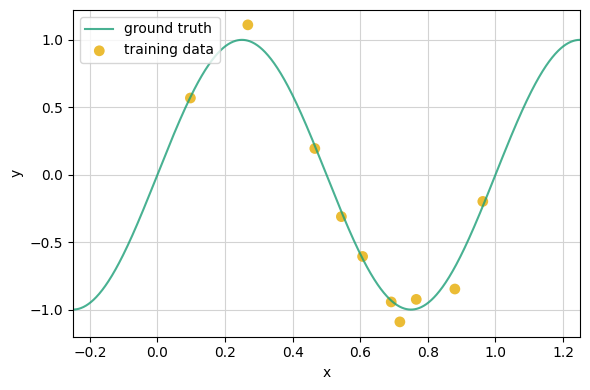

In [6]:
x_values = torch.linspace(-0.25, 1.25, 1001)
y_values = f(x_values)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(
    x_values.numpy(), y_values.numpy(),
    color=plt.cm.Dark2(0), alpha=0.8,
    label='ground truth'
)
ax.scatter(
    x_train.numpy(), y_train.numpy(),
    color=plt.cm.Dark2(5), alpha=0.8,
    edgecolors='none', s=60,
    label='training data'
)
ax.set(xlabel='x', ylabel='y')
ax.set_xlim((x_values.min(), x_values.max()))
ax.legend()
ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.tight_layout()

## Prior model

In [7]:
prior_model = ExactInferenceGP(
    x_train=None,
    y_train=None,
    prior_var=0.4,
    prior_length=0.1,
    noise_var=0.001
)

print('Prior length: {:.4f}'.format(prior_model.prior_length.item()))
print('Prior std.: {:.4f}'.format(torch.sqrt(prior_model.prior_var).item()))
print('Noise std.: {:.4f}'.format(torch.sqrt(prior_model.noise_var).item()))

Prior length: 0.1000
Prior std.: 0.6325
Noise std.: 0.0316


In [8]:
prior_model.eval() # enable eval mode for posterior predictions

with torch.no_grad():
    post_mvn = prior_model(x_values) # compute posterior predictions in eval mode
    pred_mvn = prior_model.likelihood(post_mvn) # include likelihood noise model

    pred_mean = pred_mvn.mean
    pred_std = pred_mvn.stddev
    pred_var = pred_mvn.variance
    pred_cov = pred_mvn.covariance_matrix
    pred_lower, pred_upper = pred_mvn.confidence_region() # two stds.

    pred_samples = post_mvn.sample(sample_shape=torch.Size((100,)))

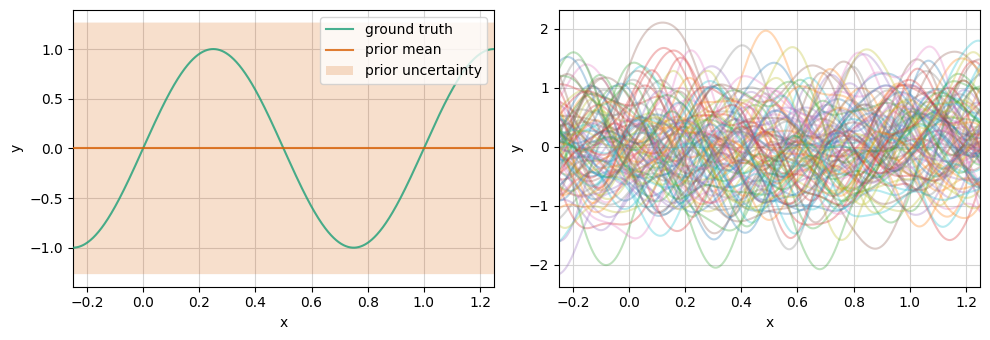

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))

true_function = ax1.plot(
    x_values.numpy(), y_values.numpy(),
    color=plt.cm.Dark2(0), alpha=0.8, zorder=3,
    label='ground truth'
)
predictions = ax1.plot(
    x_values.numpy(), pred_mean.numpy(),
    color=plt.cm.Dark2(1), alpha=0.8, zorder=5,
    label='prior mean'
)
uncertainty = ax1.fill_between(
    x_values.numpy(), pred_lower.numpy(), pred_upper.numpy(),
    color=plt.cm.Dark2(1), alpha=0.2, zorder=2,
    edgecolors='none',
    label='prior uncertainty'
)
ax1.legend()

ax2.plot(x_values.numpy(), pred_samples.T.numpy(), alpha=0.3)
ax2.set_xlim((x_values.min(), x_values.max()))

for ax in (ax1, ax2):
    ax.set(xlabel='x', ylabel='y')
    ax.set_xlim((x_values.min(), x_values.max()))
    ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
    ax.set_axisbelow(True)

fig.tight_layout()

## Posterior predictions

In [10]:
model = ExactInferenceGP(
    x_train=x_train,
    y_train=y_train,
    prior_var=0.4,
    prior_length=0.1,
    noise_var=0.001
)

print('Prior length: {:.4f}'.format(model.prior_length.item()))
print('Prior std.: {:.4f}'.format(torch.sqrt(model.prior_var).item()))
print('Noise std.: {:.4f}'.format(torch.sqrt(model.noise_var).item()))

Prior length: 0.1000
Prior std.: 0.6325
Noise std.: 0.0316


In [11]:
model.eval() # enable eval mode for posterior predictions

with torch.no_grad():
    post_mvn = model(x_values) # compute posterior predictions in eval mode
    pred_mvn = model.likelihood(post_mvn) # include likelihood noise model

    pred_mean = pred_mvn.mean
    pred_std = pred_mvn.stddev
    pred_var = pred_mvn.variance
    pred_cov = pred_mvn.covariance_matrix
    pred_lower, pred_upper = pred_mvn.confidence_region() # two stds.

    pred_samples = post_mvn.sample(sample_shape=torch.Size((100,)))

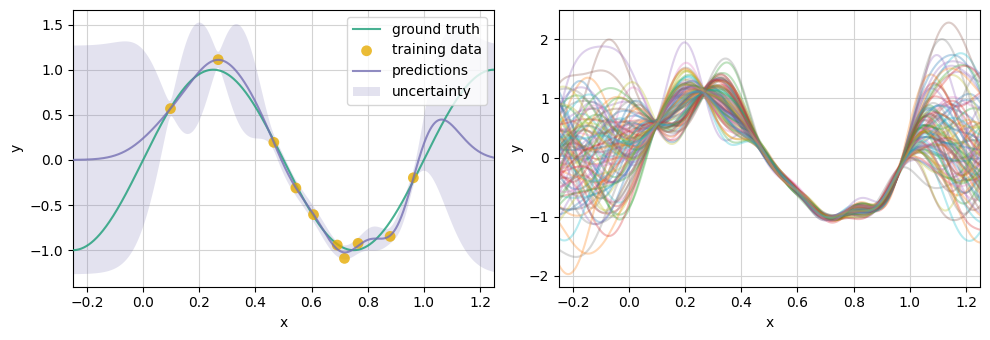

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))

true_function = ax1.plot(
    x_values.numpy(), y_values.numpy(),
    color=plt.cm.Dark2(0), alpha=0.8, zorder=3,
    label='ground truth'
)
training_data = ax1.scatter(
    x_train.numpy(), y_train.numpy(),
    color=plt.cm.Dark2(5), alpha=0.8, zorder=4,
    edgecolors='none', s=60,
    label='training data'
)
predictions = ax1.plot(
    x_values.numpy(), pred_mean.numpy(),
    color=plt.cm.Dark2(2), alpha=0.8, zorder=5,
    label='predictions'
)
uncertainty = ax1.fill_between(
    x_values.numpy(), pred_lower.numpy(), pred_upper.numpy(),
    color=plt.cm.Dark2(2), alpha=0.2, zorder=2,
    edgecolors='none',
    label='uncertainty'
)
ax1.legend()

ax2.plot(x_values.numpy(), pred_samples.T.numpy(), alpha=0.3)
ax2.set_xlim((x_values.min(), x_values.max()))

for ax in (ax1, ax2):
    ax.set(xlabel='x', ylabel='y')
    ax.set_xlim((x_values.min(), x_values.max()))
    ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
    ax.set_axisbelow(True)

fig.tight_layout()

## Hyperparameter optimization

In [13]:
model = ExactInferenceGP(
    x_train=x_train,
    y_train=y_train,
    prior_var=0.4,
    prior_length=0.1,
    noise_var=0.001
)

print('Prior length: {:.4f}'.format(model.prior_length.item()))
print('Prior std.: {:.4f}'.format(torch.sqrt(model.prior_var).item()))
print('Noise std.: {:.4f}'.format(torch.sqrt(model.noise_var).item()))

Prior length: 0.1000
Prior std.: 0.6325
Noise std.: 0.0316


In [14]:
mll = gpytorch.mlls.ExactMarginalLogLikelihood(model.likelihood, model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [15]:
num_iterations = 200
print_every = 10

model.train() # enable train mode for (prior) hyperparameter estimation

with torch.no_grad():
    prior_mvn = model(x_train) # compute (prior) distribution in train mode
    loss = -mll(prior_mvn, y_train) # compute negative log-likelihood loss
    print('Before training, loss: {:.4f}'.format(loss.item()))

for idx in range(num_iterations):
    optimizer.zero_grad()

    prior_mvn = model(x_train) # compute (prior) distribution in train mode
    loss = -mll(prior_mvn, y_train) # compute negative log-likelihood loss

    loss.backward()
    optimizer.step()

    if (idx + 1) % print_every == 0 or (idx + 1) == num_iterations:
        print('Iteration {:d}, loss: {:.4f}'.format(idx + 1, loss.item()))

print('\nPrior length: {:.4f}'.format(model.prior_length.item()))
print('Prior std.: {:.4f}'.format(torch.sqrt(model.prior_var).item()))
print('Noise std.: {:.4f}'.format(torch.sqrt(model.noise_var).item()))

Before training, loss: 0.7401
Iteration 10, loss: 0.6343
Iteration 20, loss: 0.4269
Iteration 30, loss: 0.2177
Iteration 40, loss: 0.2259
Iteration 50, loss: 0.2136
Iteration 60, loss: 0.2043
Iteration 70, loss: 0.2047
Iteration 80, loss: 0.2039
Iteration 90, loss: 0.2037
Iteration 100, loss: 0.2037
Iteration 110, loss: 0.2037
Iteration 120, loss: 0.2037
Iteration 130, loss: 0.2037
Iteration 140, loss: 0.2037
Iteration 150, loss: 0.2037
Iteration 160, loss: 0.2037
Iteration 170, loss: 0.2037
Iteration 180, loss: 0.2037
Iteration 190, loss: 0.2037
Iteration 200, loss: 0.2037

Prior length: 0.2287
Prior std.: 0.8247
Noise std.: 0.0991
